In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from sklearn.cluster import MeanShift
# Import CMasher to register colormaps
import cmasher as cmr
import geopandas as gpd
from datetime import datetime
import seaborn as sns
import cftime
import glob
import netCDF4
from scipy.stats import linregress
from decimal import Decimal, ROUND_DOWN
import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/estudiantes/anaconda/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Coordenadas de estaciones 
cor=pd.read_csv("/home/andreagvc/data/ERA/ERA/clusterinf_Had.csv")

#Seleciconando las latitudes y las longitudes
lat=cor.lat
lon=cor.Lon

In [3]:

#Encontrando las estaciones dentro de MSD
#11,18,-96,-88
sid_MSD=cor.loc[(cor.lat>=11)&(cor.lat<=18.5)&(cor.Lon>=-97)&(cor.Lon<=-88)]

#Cargando los datos de ERA5-Land
# Usar glob para seleccionar todos los archivos CSV en la ruta
archivos_nc = sorted(glob.glob("/home/andreagvc/data/ERA/ERA/ERA_*_hourly_rec*.nc"))

#Combinando los datos de ERA
ds_combinado=xr.open_mfdataset(archivos_nc,combine="by_coords")


In [4]:
sid_MSD

,distancia_costa,elevacion,temperatura,lat,Lon,humedad,localidad,ID,cluster
74,0.069336,11.0,26.346492,18.103,-94.581,0.016600,MINATITLAN,767383,0
75,0.030441,16.0,26.233825,18.183,-94.500,0.017398,COATZACOALCOS VER,767410,0
76,0.466541,14.0,27.334892,17.983,-92.817,0.016794,C P A CARLOS ROVIROSA INTL,767433,0
77,0.416704,33.0,27.111111,18.017,-92.950,0.017485,VILLAHERMOSA &,767441,0
81,1.227742,1518.0,21.150606,17.050,-96.717,0.011468,OAXACA OAX.,767750,1
82,1.175345,1520.6,21.484010,17.000,-96.733,0.007924,XOXOCOTLAN INTL,767755,1
85,1.050479,576.0,24.669832,16.750,-93.133,0.014432,TUXTLA GUTIERREZ CHIS.,768430,0
86,1.342305,2116.0,15.404542,16.750,-92.633,0.011363,SN. CRISTOBAL LAS CASAS CHIS,768450,1
87,1.288937,1646.0,18.364675,16.250,-92.133,0.011331,COMITAN CHIS.,768480,1
88,0.262532,118.0,27.420407,14.917,-92.250,0.017210,TAPACHULA CHIS,769030,0


In [5]:
sid_MSD=sid_MSD.loc[(sid_MSD.index!=82)&(sid_MSD.index!=87)]

In [6]:
sid_MSD["Lon"].iloc[1]

-94.5

In [7]:
sid_MSD

,distancia_costa,elevacion,temperatura,lat,Lon,humedad,localidad,ID,cluster
74,0.069336,11.0,26.346492,18.103,-94.581,0.016600,MINATITLAN,767383,0
75,0.030441,16.0,26.233825,18.183,-94.500,0.017398,COATZACOALCOS VER,767410,0
76,0.466541,14.0,27.334892,17.983,-92.817,0.016794,C P A CARLOS ROVIROSA INTL,767433,0
77,0.416704,33.0,27.111111,18.017,-92.950,0.017485,VILLAHERMOSA &,767441,0
81,1.227742,1518.0,21.150606,17.050,-96.717,0.011468,OAXACA OAX.,767750,1
85,1.050479,576.0,24.669832,16.750,-93.133,0.014432,TUXTLA GUTIERREZ CHIS.,768430,0
86,1.342305,2116.0,15.404542,16.750,-92.633,0.011363,SN. CRISTOBAL LAS CASAS CHIS,768450,1
88,0.262532,118.0,27.420407,14.917,-92.250,0.017210,TAPACHULA CHIS,769030,0
89,0.090748,29.6,27.449338,14.794,-92.370,0.017772,TAPACHULA INTL,769043,0


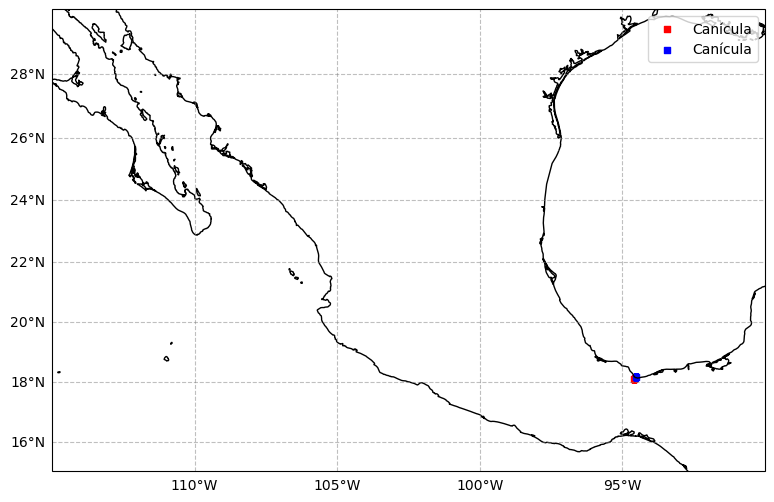

In [8]:
#Mostrando la clasificación
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Mercator()})

ax.coastlines()
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False
ax.set_extent([-115,-90,15,30],crs=ccrs.PlateCarree())

#ax.scatter(sid_MSD["Lon"].astype(float), sid_MSD["lat"].astype(float),color='firebrick', marker='s', s=30,label='Cluster1 (lejano a la costa)', transform=ccrs.PlateCarree())
#ax.scatter(lon,lat,color='orange', s=30,label='Sin canícula', transform=ccrs.PlateCarree())
ax.scatter(sid_MSD["Lon"].iloc[0], sid_MSD["lat"].iloc[0],color="red", marker='s', s=20,label='Canícula', transform=ccrs.PlateCarree())
#ax.scatter(lon,lat,color='orange', s=30,label='Sin canícula', transform=ccrs.PlateCarree())
ax.scatter(sid_MSD["Lon"].iloc[1], sid_MSD["lat"].iloc[1],color="blue", marker='s', s=20,label='Canícula', transform=ccrs.PlateCarree())
#ax.scatter(lon,lat,color='orange', s=30,label='Sin canícula', transform=ccrs.PlateCarree())
plt.legend()

#plt.savefig("Metodo_cluster.svg")
plt.show()

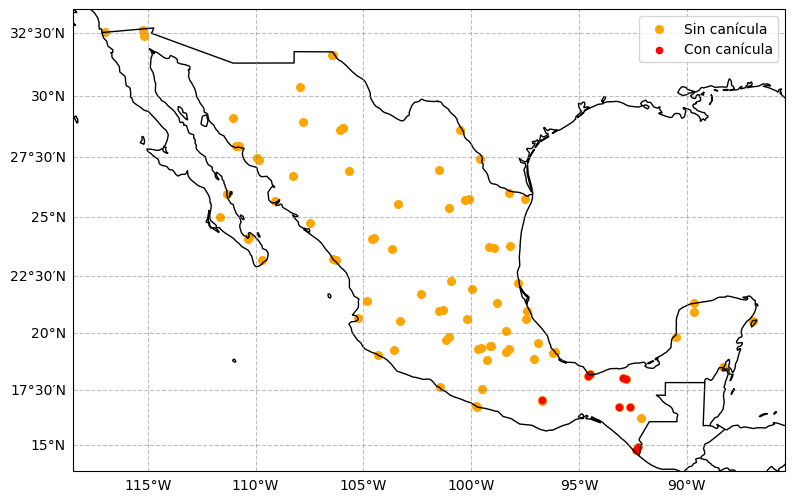

In [9]:
#Mostrando la clasificación
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Mercator()})

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False# It should turn off the upper x ticks
gl.top_labels = gl.right_labels = False


#ax.scatter(sid_MSD["Lon"].astype(float), sid_MSD["lat"].astype(float),color='firebrick', marker='s', s=30,label='Cluster1 (lejano a la costa)', transform=ccrs.PlateCarree())
ax.scatter(lon.astype(float),lat.astype(float),color='orange', s=30,label='Sin canícula', transform=ccrs.PlateCarree())
ax.scatter(sid_MSD["Lon"].astype(float), sid_MSD["lat"].astype(float),color='red', s=20,label='Con canícula', transform=ccrs.PlateCarree())
plt.legend()

plt.savefig("MSD_stations.svg",bbox_inches="tight",dpi=300)
plt.show()

In [10]:
sid_MSD

,distancia_costa,elevacion,temperatura,lat,Lon,humedad,localidad,ID,cluster
74,0.069336,11.0,26.346492,18.103,-94.581,0.016600,MINATITLAN,767383,0
75,0.030441,16.0,26.233825,18.183,-94.500,0.017398,COATZACOALCOS VER,767410,0
76,0.466541,14.0,27.334892,17.983,-92.817,0.016794,C P A CARLOS ROVIROSA INTL,767433,0
77,0.416704,33.0,27.111111,18.017,-92.950,0.017485,VILLAHERMOSA &,767441,0
81,1.227742,1518.0,21.150606,17.050,-96.717,0.011468,OAXACA OAX.,767750,1
85,1.050479,576.0,24.669832,16.750,-93.133,0.014432,TUXTLA GUTIERREZ CHIS.,768430,0
86,1.342305,2116.0,15.404542,16.750,-92.633,0.011363,SN. CRISTOBAL LAS CASAS CHIS,768450,1
88,0.262532,118.0,27.420407,14.917,-92.250,0.017210,TAPACHULA CHIS,769030,0
89,0.090748,29.6,27.449338,14.794,-92.370,0.017772,TAPACHULA INTL,769043,0


In [11]:
#Seleccionando las variables con las estaciones dentro del área de MSD

Tw_ERA_d=ds_combinado.TWB_d.loc[ds_combinado.TWB_d.sid.isin(sid_MSD)]
T_ERA_d=ds_combinado.T_d.loc[ds_combinado.T_d.sid.isin(sid_MSD)]
q_ERA_d=ds_combinado.q_d.loc[ds_combinado.q_d.sid.isin(sid_MSD)]

In [12]:
Tw_ERA_d.time[0:25]

<xarray.DataArray 'time' (time: 25)> Size: 200B
array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', '1979-01-01T03:00:00.000000000',
       '1979-01-01T04:00:00.000000000', '1979-01-01T05:00:00.000000000',
       '1979-01-01T06:00:00.000000000', '1979-01-01T07:00:00.000000000',
       '1979-01-01T08:00:00.000000000', '1979-01-01T09:00:00.000000000',
       '1979-01-01T10:00:00.000000000', '1979-01-01T11:00:00.000000000',
       '1979-01-01T12:00:00.000000000', '1979-01-01T13:00:00.000000000',
       '1979-01-01T14:00:00.000000000', '1979-01-01T15:00:00.000000000',
       '1979-01-01T16:00:00.000000000', '1979-01-01T17:00:00.000000000',
       '1979-01-01T18:00:00.000000000', '1979-01-01T19:00:00.000000000',
       '1979-01-01T20:00:00.000000000', '1979-01-01T21:00:00.000000000',
       '1979-01-01T22:00:00.000000000', '1979-01-01T23:00:00.000000000',
       '1979-01-02T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 200B 1979-01-01 ... 1979-01-02
    number   int64 8B 0
    expver   (time) <U4 400B dask.array<chunksize=(25,), meta=np.ndarray>

In [13]:
#Cargando las fechas
MSD=pd.read_csv("average_dates_1979-2018.csv")

#PASANDO LAS FECHAS A FORMATO DATETIME
MSD["Onset"]=pd.to_datetime(MSD["Onset"])
MSD["Year"]=pd.to_datetime(MSD["Year"])
MSD["Retreat"]=pd.to_datetime(MSD["Retreat"])
MSD["MSDO"]=pd.to_datetime(MSD["MSDO"])
MSD["MSDE"]=pd.to_datetime(MSD["MSDE"])


In [14]:
#Promediando las estaciones que tienen canícula
Tw_ERA=Tw_ERA_d.mean("sid")

T_ERA=T_ERA_d.mean("sid")

q_ERA=q_ERA_d.mean("sid")


In [15]:
#(datos.time.dt.date>datos.time.dt.date[2170])
def MSD_rec(datos):
    for i,ii in enumerate(MSD.Onset.dt.date):
        data=datos.loc[(datos.time.dt.year==MSD.Onset.dt.year[i])&(datos.time.dt.month>2)&(datos.time.dt.date<=ii)]
        if i==0:
            dry_spring=data

        else:
            new = xr.concat([dry_spring, data], dim="time")
            dry_spring=new
    return dry_spring

In [16]:
Tw_dry_spring=MSD_rec(Tw_ERA)
T_dry_spring=MSD_rec(T_ERA)
q_dry_spring=MSD_rec(q_ERA)

In [17]:
print(q_dry_spring.max().values*1000)

18.411731347441673


In [18]:
def MSD_period(datos):
    for i,ii in enumerate(MSD.MSDO.dt.date):
        data=datos.loc[(datos.time.dt.year==MSD.MSDO.dt.year[i])&(datos.time.dt.date>=ii) & (datos.time.dt.date<=MSD.MSDE.dt.date.iloc[i])]
        if i==0:
            g=data

        else:

            new = xr.concat([g, data], dim="time")
            g=new
    return g

In [19]:
Tw_MSD=MSD_period(Tw_ERA)
T_MSD=MSD_period(T_ERA)
q_MSD=MSD_period(q_ERA)

In [20]:
def MSD_winterdry (datos):
    for i,ii in enumerate(MSD.Retreat.dt.date):
        data=datos.loc[(datos.time.dt.year==MSD.Retreat.dt.year[i]) &(datos.time.dt.date>=ii)]
        if i==0:
            g=data

        else:

            new = xr.concat([g, data], dim="time")
            g=new
    return g

In [21]:
Tw_MSD_wdry=MSD_winterdry(Tw_ERA)
T_MSD_wdry=MSD_winterdry(T_ERA)
q_MSD_wdry=MSD_winterdry(q_ERA)

In [22]:
def onset_MSDO (datos):
    for i,ii in enumerate(MSD.Onset.dt.date):
        data=datos.loc[(datos.time.dt.year==MSD.Onset.dt.year[i]) &(datos.time.dt.date>=ii) & (datos.time.dt.date<=MSD.MSDO.dt.date.iloc[i])]
        if i==0:
            g=data

        else:

            new = xr.concat([g, data], dim="time")
            g=new
    return g

In [23]:
Tw_fpick_ERA=onset_MSDO(Tw_ERA)
T_fpick_ERA=onset_MSDO(T_ERA)
q_fpick_ERA=onset_MSDO(q_ERA)

In [24]:
def MSDE_retreat (datos):
    for i,ii in enumerate(MSD.MSDE.dt.date):
        data=datos.loc[(datos.time.dt.year==MSD.MSDE.dt.year[i]) &(datos.time.dt.date>=ii) & (datos.time.dt.date<=MSD.Retreat.dt.date.iloc[i])]
        if i==0:
            g=data

        else:

            new = xr.concat([g, data], dim="time")
            g=new
    return g

In [25]:
Tw_spick_ERA=MSDE_retreat(Tw_ERA)
T_spick_ERA=MSDE_retreat(T_ERA)
q_spick_ERA=MSDE_retreat(q_ERA)

In [26]:
#Recortando los datos de HadISD

df=pd.read_csv("/home/andreagvc/data/ERA/ERA/IDD.csv",header=None)
ID=df[(df[0]>="760011-99999")&(df[0]<="780160-13601")] 
ID1=ID[0].str.split(pat="-", expand=True) #Separando 
ID["ID"]=ID1[0].astype(int)

esta=pd.read_fwf("/home/andreagvc/data/ERA/ERA/ID.txt",header=None)
p=esta[1]
filtered_df = ID[(ID["ID"]).isin(p)]
filtered_df #Encontrando los datos de las estaciones que ocupamos
lat=filtered_df[2].values
lon=filtered_df[3].values
ele=filtered_df[4].values

#Agregando la elevación al dataframe
esta["elevacion"]=ele
esta["Lat"]=lat
esta["Lon"]=lon
esta["Lugar"]=filtered_df[1].values

/tmp/ipykernel_163733/400069161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID["ID"]=ID1[0].astype(int)


In [27]:
#Cargando los datos de las estaciones Had_ISD pero horarios
da_list=[]
for i,ii in enumerate(sid_MSD.ID):
    datos=xr.open_dataset(f"/home/andreagvc/data/ERA/ERA/Datos_HAD/{ii}99999.nc")
    datos=datos.assign_coords(estacion=ii)
    datos=datos.expand_dims('estacion')
    da_list.append(datos)

In [28]:
HAD=xr.concat(da_list,dim='estacion')

In [29]:
Tw_Had=HAD.Tw.where(HAD.Tw.time.dt.year>1978,drop=True)
T_Had=HAD.T.where(HAD.T.time.dt.year>1978,drop=True)
q_Had=HAD.SH.where(HAD.SH.time.dt.year>1978,drop=True)

In [30]:
#Promediando las estaciones que tienen canícula
Tw_Had=Tw_Had.mean("estacion")

T_Had=T_Had.mean("estacion")

q_Had=q_Had.mean("estacion")


In [31]:
#Recorte periodo seco-primavera
Tw_drys_HAD=MSD_rec(Tw_Had)
T_drys_HAD=MSD_rec(T_Had)
q_drys_HAD=MSD_rec(q_Had)

In [32]:
#Recorte periodo-MSD
Tw_MSD_HAD=MSD_period(Tw_Had)
T_MSD_HAD=MSD_period(T_Had)
q_MSD_HAD=MSD_period(q_Had)

In [33]:
#Recorte periodo seco-invierno
Tw_wdry_HAD=MSD_winterdry(Tw_Had)
T_wdry_HAD=MSD_winterdry(T_Had)
q_wdry_HAD=MSD_winterdry(q_Had)

In [34]:
#Recorte primer pico
Tw_fpick_HAD=onset_MSDO(Tw_Had)
T_fpick_HAD=onset_MSDO(T_Had)
q_fpick_HAD=onset_MSDO(q_Had)

In [35]:
#Recorte segundo pico
Tw_spick_HAD=MSDE_retreat(Tw_Had)
T_spick_HAD=MSDE_retreat(T_Had)
q_spick_HAD=MSDE_retreat(q_Had)

In [51]:
q_drys_HAD.time

<xarray.DataArray 'time' (time: 24219)> Size: 194kB
array(['1979-03-01T00:00:00.000000000', '1979-03-01T06:00:00.000000000',
       '1979-03-01T12:00:00.000000000', ..., '2018-04-26T15:00:00.000000000',
       '2018-04-26T18:00:00.000000000', '2018-04-26T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 194kB 1979-03-01 ... 2018-04-26T21:00:00

In [37]:
np.percentile(Tw_drys_HAD,95)-273.15

25.029999999999973

In [38]:
np.percentile(Tw_drys_HAD-273.15,95)

25.029999999999973

In [39]:
Tw_drys_HAD

<xarray.DataArray 'Tw' (time: 24219)> Size: 194kB
array([295.87      , 291.525     , 289.25333333, ..., 296.1725    ,
       297.6125    , 297.06555556])
Coordinates:
  * time     (time) datetime64[ns] 194kB 1979-03-01 ... 2018-04-26T21:00:00

In [40]:
data = [Tw_drys_HAD-273.15,Tw_fpick_HAD-273.15,Tw_MSD_HAD-273.15,Tw_spick_HAD-273.15, Tw_wdry_HAD-273.15, 
        T_drys_HAD,T_fpick_HAD,T_MSD_HAD,T_spick_HAD,
        T_wdry_HAD, q_drys_HAD*1000,q_fpick_HAD*1000,q_MSD_HAD*1000,q_spick_HAD*1000, q_wdry_HAD*1000, Tw_dry_spring,Tw_fpick_ERA,Tw_MSD,Tw_spick_ERA, 
        Tw_MSD_wdry, T_dry_spring,T_fpick_ERA,T_MSD,T_spick_ERA, T_MSD_wdry,q_dry_spring*1000,q_fpick_ERA*1000,q_MSD*1000,q_spick_ERA*1000, 
        q_MSD_wdry*1000]
d=[]
# Supongamos que tenemos los siguientes datos para agregar
dataset = ["HadISD","ERA5-Land"]
periodo = ["DS", "FP","MSD","SP","DW"]
var=["TW","T","SH"]
n=0
p=0
# Usamos un ciclo for para llenar el DataFrame
for i in range(len(data)):
    print(i)
    if i<15:
        datos=dataset[0]
    else:
        datos=dataset[1]
    
    
    # Añadir una fila al DataFrame en cada iteración
    prom=np.array(data[i].mean())
    perc = np.percentile(data[i], 95)
   
    print(perc)
    d.append([datos, periodo[n], var[p],prom, perc])
    n=n+1
    if n==5:
        n=0
        p=p+1
    if p==3:
        p=0
    

# Crear un DataFrame a partir de la lista de listas
df = pd.DataFrame(d, columns=["Dataset", "Periodo", "Variable","Promedio","P95"])

# Mostrar el DataFrame
print(df)

0
25.029999999999973
1
25.79516666666668
2
25.50999999999999
3
25.1369583333333
4
23.829999999999984
5
32.1
6
32.0
7
30.642857142857142
8
30.0
9
28.7
10
18.518962602001412
11
19.537342551706068
12
19.176388043113327
13
18.990995833893543
14
17.52882247579038
15
21.748277777777776
16
22.873333333333328
17
22.75888888888889
18
22.724444444444444
19
21.313333333333333
20
30.983157539367674
21
30.142547130584717
22
28.27123737335205
23
27.2638578414917
24
26.416471195220947
25
15.797772073745726
26
17.37472915649414
27
17.223426342010498
28
17.342087745666504
29
15.853745174407958
      Dataset Periodo Variable            Promedio        P95
0      HadISD      DS       TW   20.84657864938766  25.030000
1      HadISD      FP       TW  22.317510263596017  25.795167
2      HadISD     MSD       TW  22.191646293875994  25.510000
3      HadISD      SP       TW  21.908448564570904  25.136958
4      HadISD      DW       TW   19.71387426283537  23.830000
5      HadISD      DS        T  25.112092553

In [41]:
df.to_csv("esta_MSD.csv",index=False)

In [42]:
estadis=pd.read_csv("esta_MSD.csv")

In [43]:
ERA=estadis.loc[estadis.Dataset=="ERA5-Land"]

In [44]:
HAD_e=estadis.loc[estadis.Dataset=="HadISD"]

In [45]:
HAD_e

,Dataset,Periodo,Variable,Promedio,P95
0,HadISD,DS,TW,20.846579,25.030000
1,HadISD,FP,TW,22.317510,25.795167
2,HadISD,MSD,TW,22.191646,25.510000
3,HadISD,SP,TW,21.908449,25.136958
4,HadISD,DW,TW,19.713874,23.830000
5,HadISD,DS,T,25.112093,32.100000
6,HadISD,FP,T,25.753350,32.000000
7,HadISD,MSD,T,25.172582,30.642857
8,HadISD,SP,T,24.468091,30.000000
9,HadISD,DW,T,22.496200,28.700000


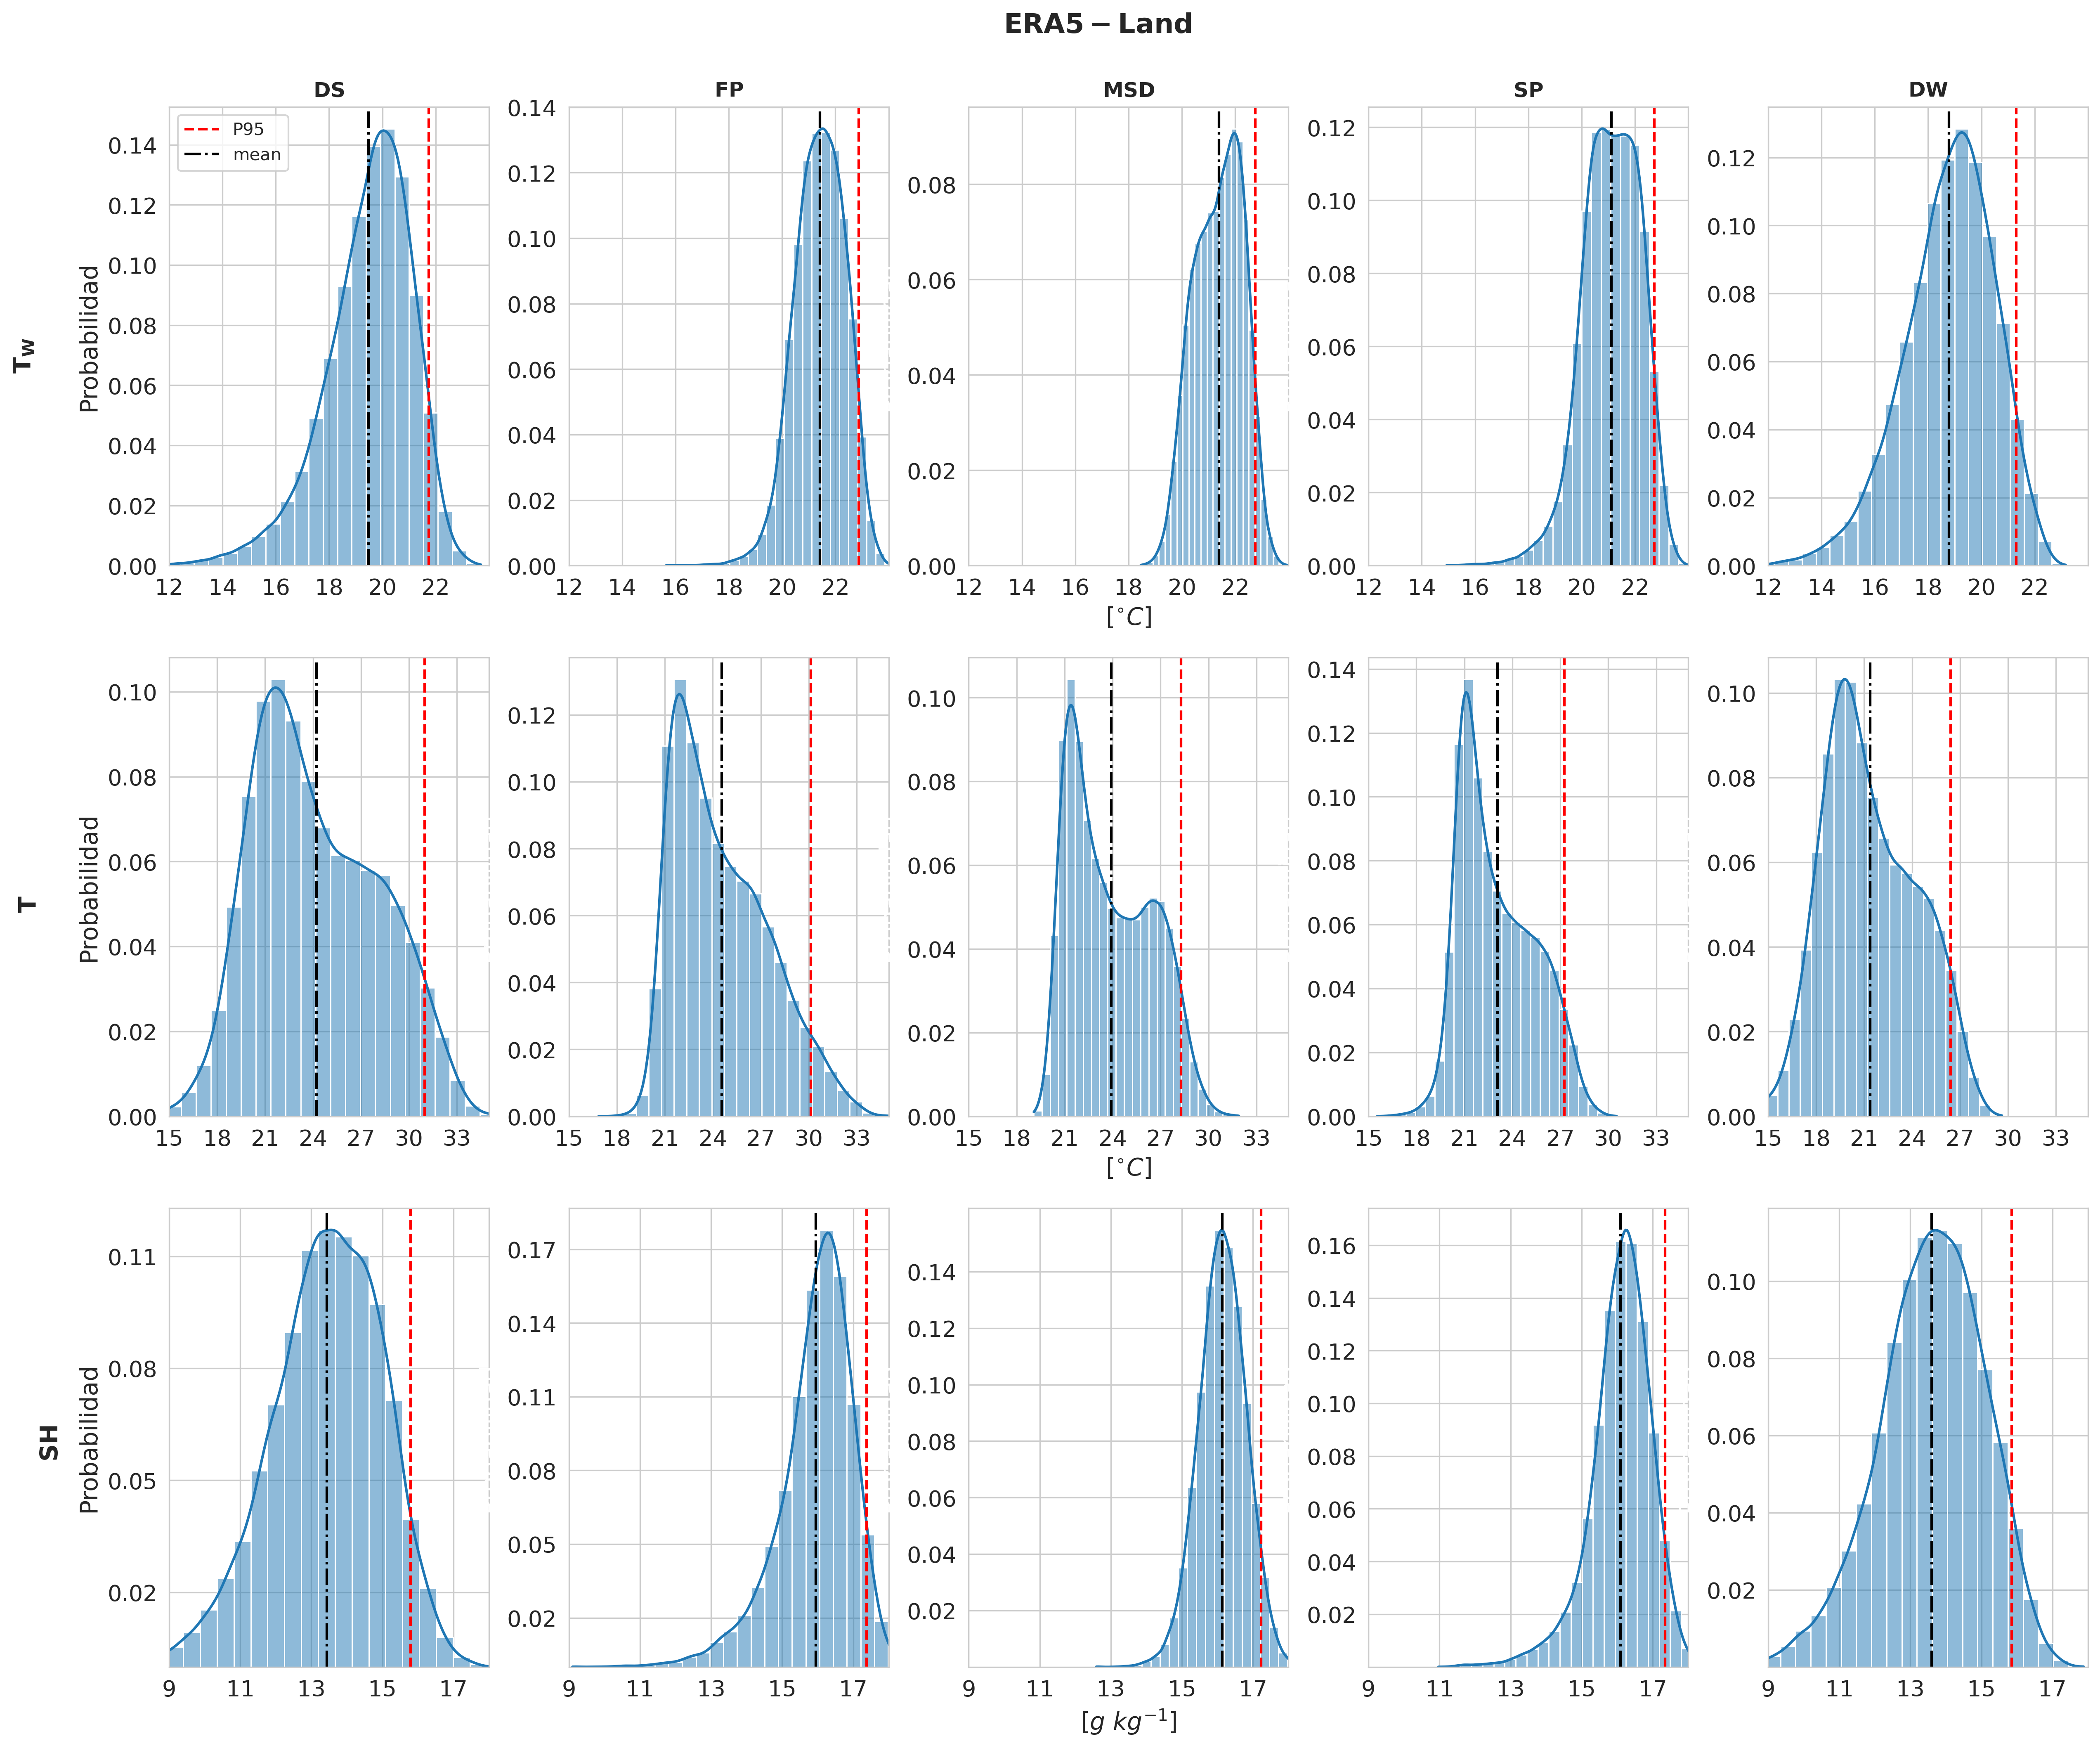

In [49]:
plt.figure(figsize=(20, 15),dpi=300)

plt.subplot(3,5,2)

sns.histplot(data=Tw_fpick_ERA,  kde=True,stat="probability" ,kde_kws={'bw_adjust':1.25},bins=25)  # Cambiar el estilo del gráfico

plt.yticks(fontsize=13)
plt.title(r"$\mathbf{FP}$",fontsize=12)
plt.axvline(ERA.P95.iloc[1], color='red', linestyle='--',label="P95")
plt.axvline(ERA.Promedio.iloc[1], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(12,24,2),fontsize=13)
plt.xlim(12,24)
# Estilizar

#plt.text(39, 0.086, "a)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))

plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,5)
sns.histplot(data=Tw_MSD_wdry, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[4], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[4], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(12,24,2),fontsize=13)
plt.xlim(12,24)
plt.yticks(fontsize=13)
plt.title(r"$\mathbf{DW}$",fontsize=12)
#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,3)
sns.histplot(data=Tw_MSD, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[2], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[2], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(12,24,2),fontsize=13)
plt.xlim(12,24)
plt.yticks(fontsize=13)
plt.title(r"$\mathbf{MSD}$",fontsize=12)
#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
plt.xlabel("$[^{\circ}C]$",fontsize=14)
plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,4)
sns.histplot(data=Tw_spick_ERA, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[3], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[3], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(12,24,2),fontsize=13)
plt.xlim(12,24)
plt.yticks(fontsize=13)
plt.title(r"$\mathbf{SP}$",fontsize=12)
#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,1)
ax=sns.histplot(data=Tw_dry_spring, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[0], color='red', linestyle='--',label="P95")
plt.axvline(ERA.Promedio.iloc[0], color='black', linestyle='-.',label="mean")
plt.title(r"$\mathbf{DS}$",fontsize=12)
ax.text(7, 0.07, r'$\mathbf{T}$$\mathbf{_W}$',fontsize=14, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor')
plt.xticks(np.arange(12,24,2),fontsize=13)
plt.xlim(12,24)
plt.yticks(fontsize=13)
plt.legend(loc="upper left")
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar


plt.ylabel("Probabilidad",fontsize=14)
#plt.savefig("dist_ERAvsHAD.svg",bbox_inches="tight")

plt.subplot(3,5,6)
ax=sns.histplot(data=T_dry_spring,  kde=True,stat="probability" ,kde_kws={'bw_adjust':1.25},bins=25)
plt.axvline(ERA.P95.iloc[5], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[5], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(15,35,3),fontsize=13)
plt.xlim(15,35)
plt.yticks(fontsize=13)
ax.text(7, 0.05, r'$\mathbf{T}$',fontsize=14, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor')

# Estilizar

#plt.text(39, 0.086, "a)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))

plt.ylabel("Probabilidad",fontsize=14)

plt.subplot(3,5,7)
sns.histplot(data=T_fpick_ERA, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[6], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[6], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(15,35,3),fontsize=13)
plt.xlim(15,35)
plt.yticks(fontsize=13)

#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

plt.ylabel("Probabilidad",fontsize=14,color="white")


plt.subplot(3,5,8)
sns.histplot(data=T_MSD, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[7], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[7], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(15,35,3),fontsize=13)
plt.xlim(15,35)
plt.yticks(fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
plt.xlabel("$[^{\circ}C]$",fontsize=14)
plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,9)
sns.histplot(data=T_spick_ERA, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[8], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[8], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(15,35,3),fontsize=13)
plt.xlim(15,35)
plt.yticks(fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

plt.ylabel("Probabilidad",fontsize=14,color="white")


plt.subplot(3,5,10)
sns.histplot(data=T_MSD_wdry, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[9], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[9], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(15,35,3),fontsize=13)
plt.xlim(15,35)
plt.yticks(fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

plt.ylabel("Probabilidad",fontsize=14,color="white")


plt.subplot(3,5,11)
ax=sns.histplot(data=q_dry_spring*1000,  kde=True,stat="probability" ,kde_kws={'bw_adjust':1.25},bins=25)
plt.axvline(ERA.P95.iloc[10], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[10], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(9,18,2),fontsize=13)
plt.xlim(9,18)
plt.yticks(np.arange(0.02, 0.12,0.03),fontsize=13)
ax.text(6, 0.06, r'$\mathbf{SH}$',fontsize=14, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor')

# Estilizar

#plt.text(39, 0.086, "a)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))

plt.ylabel("Probabilidad",fontsize=14)

plt.subplot(3,5,12)
sns.histplot(data=q_fpick_ERA*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[11], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[11], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(9,18,2),fontsize=13)
plt.xlim(9,18)
plt.yticks(np.arange(0.02, 0.18,0.03),fontsize=13)

#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

plt.ylabel("Probabilidad",fontsize=14,color="white")


plt.subplot(3,5,13)
sns.histplot(data=q_MSD*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[12], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[12], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(9,18,2),fontsize=13)
plt.xlim(9,18)
plt.yticks(np.arange(0.02, 0.15,0.02),fontsize=13)
plt.ylabel("Probabilidad",fontsize=14,color="white")
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

plt.xlabel("[$g$ $kg^{-1}$]",fontsize=14)
plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,14)
sns.histplot(data=q_spick_ERA*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[13], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[13], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(9,18,2),fontsize=13)
plt.xlim(9,18)
plt.yticks(np.arange(0.02, 0.17,0.02),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar


plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,15)
sns.histplot(data=q_MSD_wdry*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(ERA.P95.iloc[14], color='red', linestyle='--')
plt.axvline(ERA.Promedio.iloc[14], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(9,18,2),fontsize=13)
plt.xlim(9,18)
plt.yticks(np.arange(0.02, 0.12,0.02),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar


plt.ylabel("Probabilidad",fontsize=14,color="white")
plt.suptitle(r"$\mathbf{ERA5-Land}$", fontsize=16,y=1.001)
plt.subplots_adjust(top=0.95,wspace=0.25)
plt.savefig("MSD_ERA.svg",bbox_inches="tight",dpi=300)

plt.show()

In [47]:
HAD_e

,Dataset,Periodo,Variable,Promedio,P95
0,HadISD,DS,TW,20.846579,25.030000
1,HadISD,FP,TW,22.317510,25.795167
2,HadISD,MSD,TW,22.191646,25.510000
3,HadISD,SP,TW,21.908449,25.136958
4,HadISD,DW,TW,19.713874,23.830000
5,HadISD,DS,T,25.112093,32.100000
6,HadISD,FP,T,25.753350,32.000000
7,HadISD,MSD,T,25.172582,30.642857
8,HadISD,SP,T,24.468091,30.000000
9,HadISD,DW,T,22.496200,28.700000


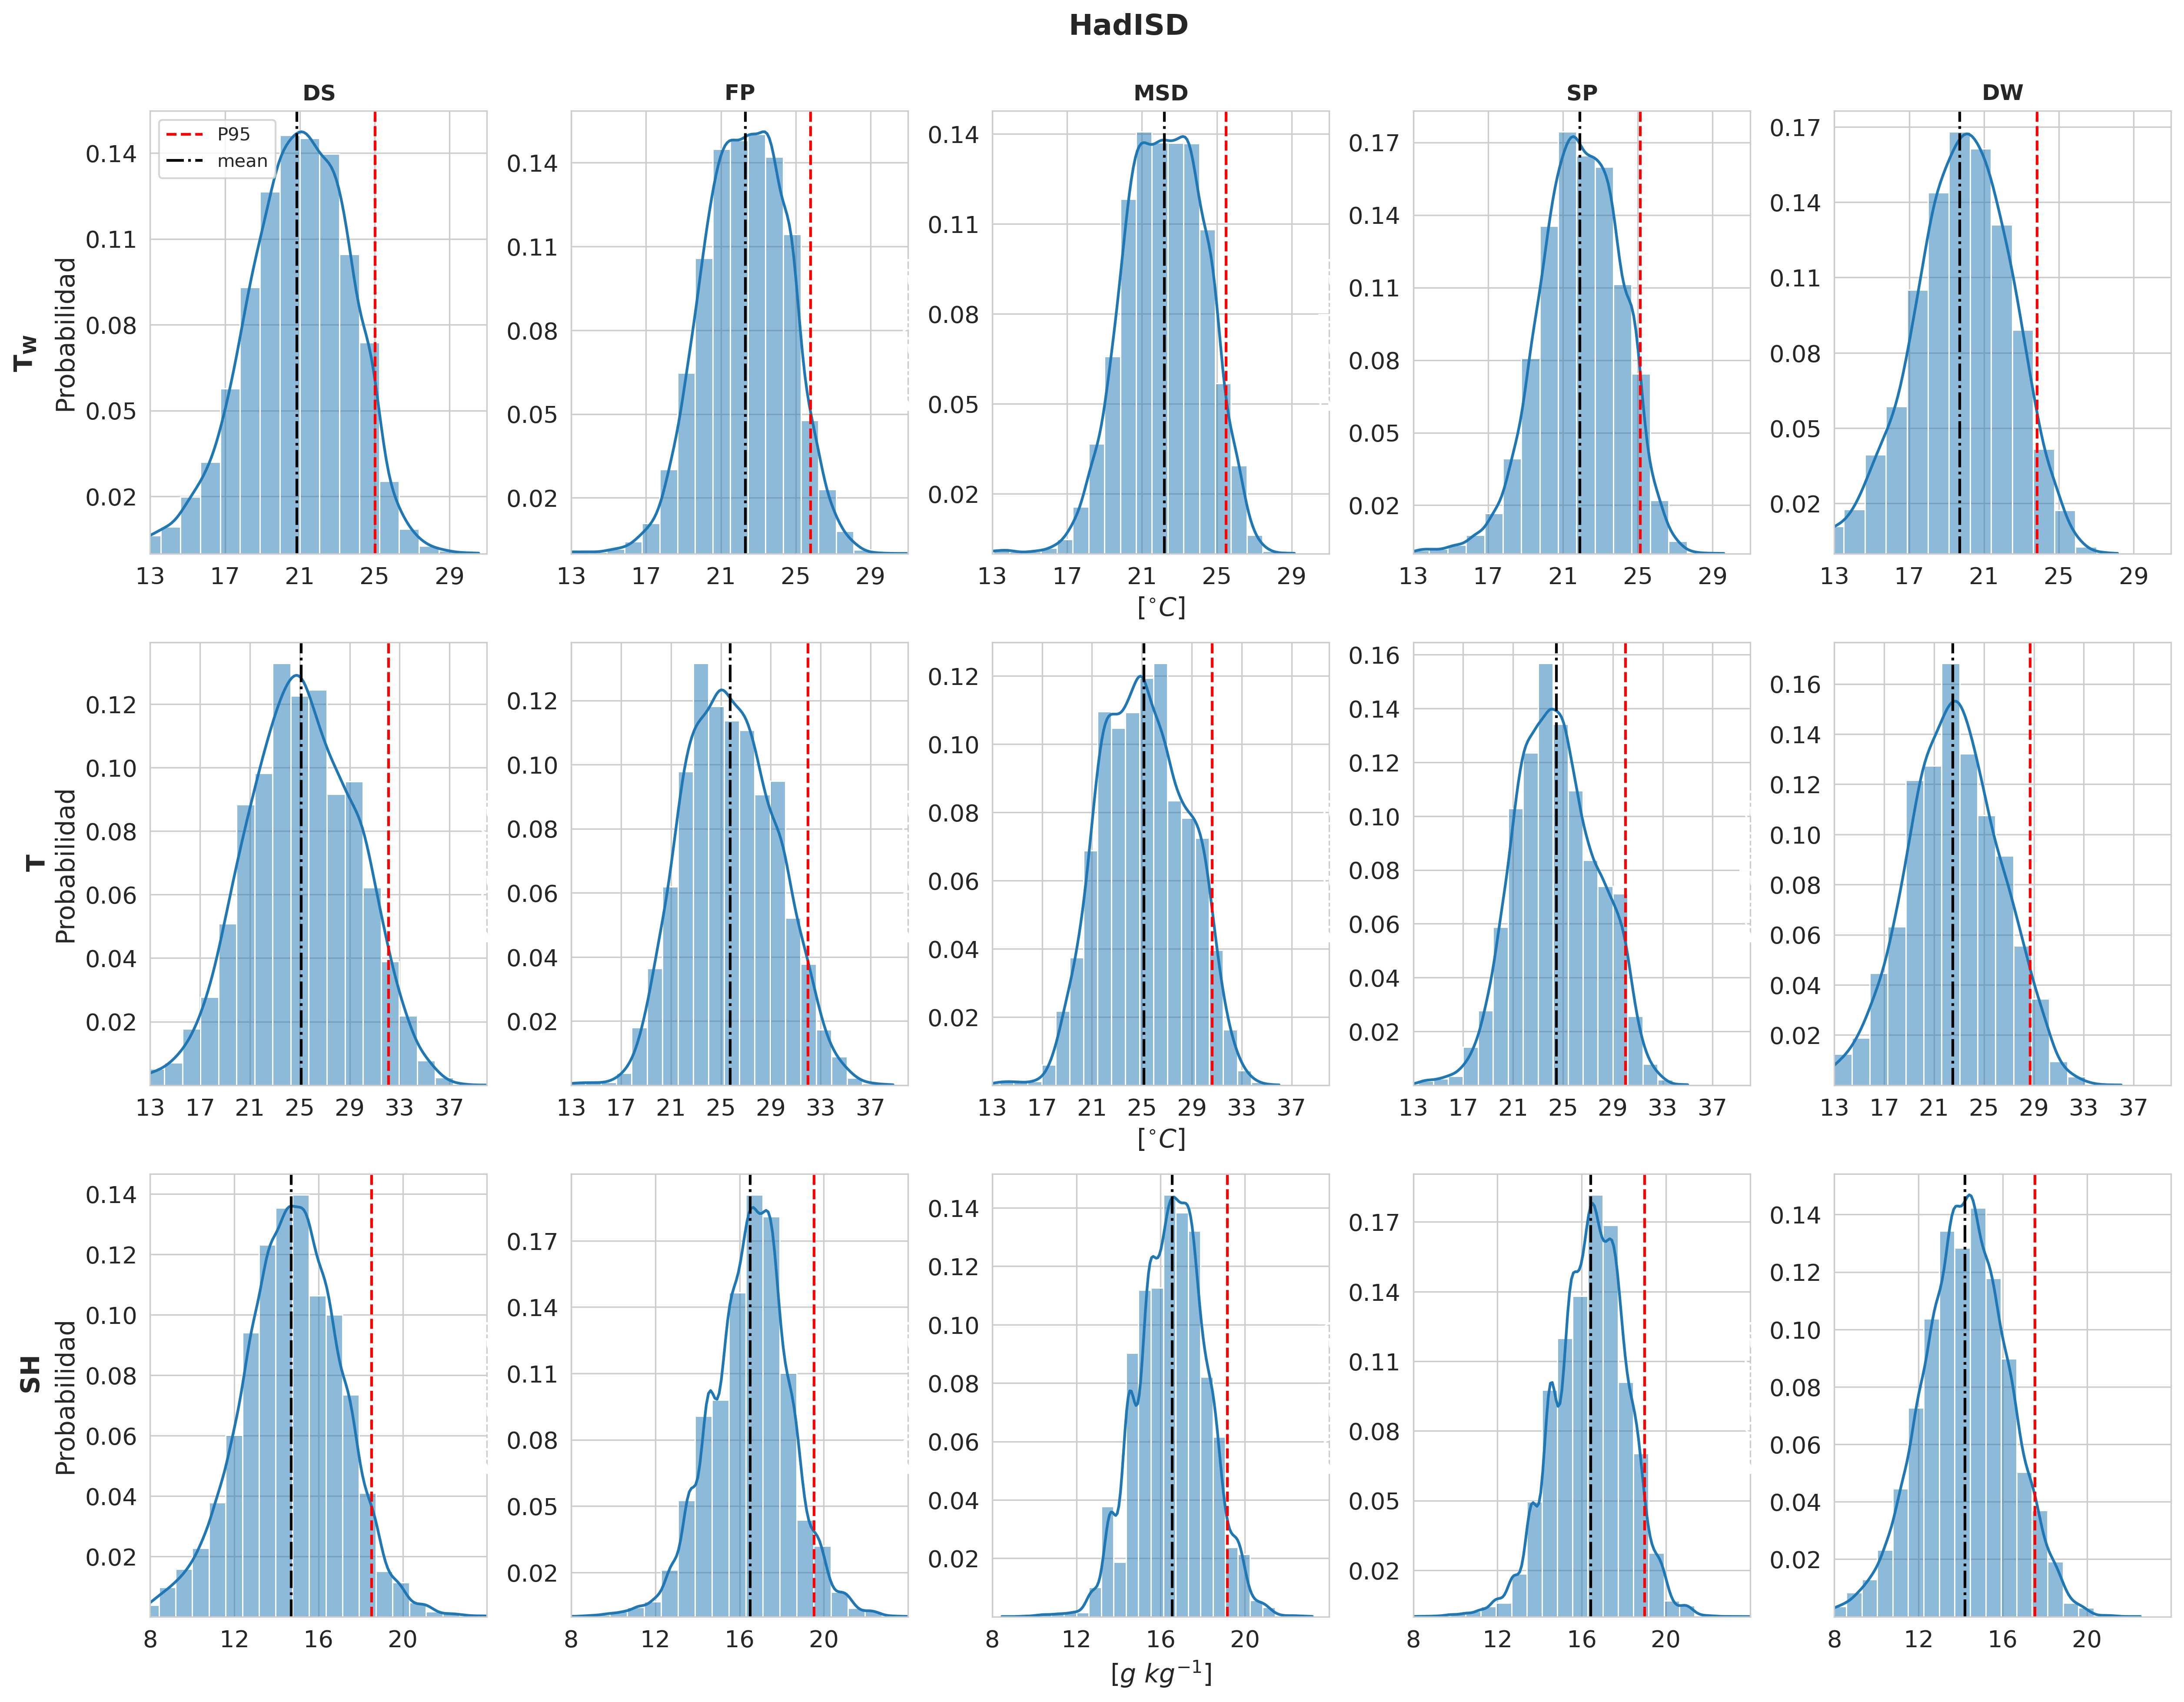

In [48]:
plt.figure(figsize=(20, 15),dpi=300)
sns.set_style("whitegrid")
plt.subplot(3,5,2)

ax=sns.histplot(data=Tw_fpick_HAD-273.15,  kde=True,stat="probability" ,kde_kws={'bw_adjust':1.25},bins=25)  # Cambiar el estilo del gráfico

plt.xticks(np.arange(13,31,4),fontsize=13)
plt.xlim(13,31)
plt.yticks(np.arange(0.02, 0.15,0.03),fontsize=13)
plt.title(r"$\mathbf{FP}$",fontsize=12)
plt.axvline(HAD_e.P95.iloc[1], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[1], color='black', linestyle='-.',label="mean")
# Estilizar
#plt.xlabel("$[^{\circ}C]$",fontsize=14)
#plt.text(39, 0.086, "a)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))

plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,5)

sns.histplot(data=Tw_wdry_HAD-273.15, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[4], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[4], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(13,31,4),fontsize=13)
plt.xlim(13,31)
plt.yticks(np.arange(0.02, 0.18,0.03),fontsize=13)
plt.title(r"$\mathbf{DW}$",fontsize=12)
#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
#plt.xlabel("$[^{\circ}C]$",fontsize=14)
plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,3)

sns.histplot(data=Tw_MSD_HAD-273.15, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[2], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[2], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(13,31,4),fontsize=13)
plt.xlim(13,31)
plt.yticks(np.arange(0.02, 0.16,0.03),fontsize=13)
plt.title(r"$\mathbf{MSD}$",fontsize=12)
#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
plt.xlabel("$[^{\circ}C]$",fontsize=14)
plt.ylabel("Probabilidad",fontsize=14,color="white")


plt.subplot(3,5,4)
sns.histplot(data=Tw_spick_HAD-273.15, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[3], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[3], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(13,31,4),fontsize=13)
plt.xlim(13,31)
plt.yticks(np.arange(0.02, 0.18,0.03),fontsize=13)
plt.title(r"$\mathbf{SP}$",fontsize=12)
#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
#plt.xlabel("$[^{\circ}C]$",fontsize=14)
plt.ylabel("Probabilidad",fontsize=14,color="white")


plt.subplot(3,5,1)
ax=sns.histplot(data=Tw_drys_HAD-273.15, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[0], color='red', linestyle='--',label="P95")
plt.axvline(HAD_e.Promedio.iloc[0], color='black', linestyle='-.',label="mean")
plt.title(r"$\mathbf{DS}$",fontsize=12)
ax.text(7, 0.07, r'$\mathbf{T}$$\mathbf{_W}$',fontsize=14, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor')
plt.xticks(np.arange(13,31,4),fontsize=13)
plt.xlim(13,31)
plt.yticks(np.arange(0.02, 0.15,0.03),fontsize=13)
plt.legend(loc="upper left")
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

#plt.xlabel("$[^{\circ}C]$",fontsize=14)
plt.ylabel("Probabilidad",fontsize=14)
#plt.savefig("dist_ERAvsHAD.svg",bbox_inches="tight")

plt.subplot(3,5,6)
ax=sns.histplot(data=T_drys_HAD,  kde=True,stat="probability" ,kde_kws={'bw_adjust':1.25},bins=25)
plt.axvline(HAD_e.P95.iloc[5], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[5], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(13,40,4),fontsize=13)
plt.xlim(13,40)
plt.yticks(np.arange(0.02, 0.13,0.02),fontsize=13)
ax.text(5, 0.07, r'$\mathbf{T}$',fontsize=14, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor')
# Estilizar
#plt.xlabel("$[^{\circ}C]$",fontsize=14)
#plt.text(39, 0.086, "a)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))

plt.ylabel("Probabilidad",fontsize=14)

plt.subplot(3,5,7)
sns.histplot(data=T_fpick_HAD, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[6], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[6], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(13,40,4),fontsize=13)
plt.xlim(13,40)
plt.yticks(np.arange(0.02, 0.13,0.02),fontsize=13)
plt.ylabel("Probabilidad",fontsize=14,color="white")

#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
#plt.xlabel("$[^{\circ}C]$",fontsize=14)



plt.subplot(3,5,8)
sns.histplot(data=T_MSD_HAD, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[7], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[7], color='black', linestyle='-.',label="mean")

plt.xticks(np.arange(13,40,4),fontsize=13)
plt.xlim(13,40)
plt.yticks(np.arange(0.02, 0.13,0.02),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
plt.ylabel("Probabilidad",fontsize=14,color="white")
plt.xlabel("$[^{\circ}C]$",fontsize=14)


plt.subplot(3,5,9)
sns.histplot(data=T_spick_HAD, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[8], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[8], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(13,40,4),fontsize=13)
plt.xlim(13,40)
plt.yticks(np.arange(0.02, 0.16,0.02),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

#plt.xlabel("$[^{\circ}C]$",fontsize=14)

plt.ylabel("Probabilidad",fontsize=14,color="white")
plt.subplot(3,5,10)
sns.histplot(data=T_wdry_HAD, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[9], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[9], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(13,40,4),fontsize=13)
plt.xlim(13,40)
plt.yticks(np.arange(0.02, 0.17,0.02),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar

#plt.xlabel("$[^{\circ}C]$",fontsize=14)

plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,11)
ax=sns.histplot(data=q_drys_HAD*1000,  kde=True,stat="probability" ,kde_kws={'bw_adjust':1.25},bins=25)
plt.axvline(HAD_e.P95.iloc[10], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[10], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(8,24,4),fontsize=13)
plt.xlim(8,24)
plt.yticks(np.arange(0.02, 0.15,0.02),fontsize=13)
ax.text(3, 0.08, r'$\mathbf{SH}$',fontsize=14, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor')

# Estilizar
#plt.xlabel("[$g$ $kg^{-1}$]",fontsize=14)
#plt.text(39, 0.086, "a)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))

plt.ylabel("Probabilidad",fontsize=14)

plt.subplot(3,5,12)
sns.histplot(data=q_fpick_HAD*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[11], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[11], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(8,24,4),fontsize=13)
plt.xlim(8,24)
plt.yticks(np.arange(0.02, 0.18,0.03),fontsize=13)

#plt.text(26.5, 0.0625, "b)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
#plt.xlabel("[$g$ $kg^{-1}$]",fontsize=14)

plt.ylabel("Probabilidad",fontsize=14,color="white")

plt.subplot(3,5,13)
sns.histplot(data=q_MSD_HAD*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[12], color='red', linestyle='--')

plt.axvline(HAD_e.Promedio.iloc[12], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(8,24,4),fontsize=13)
plt.xlim(8,24)
plt.yticks(np.arange(0.02, 0.15,0.02),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
plt.ylabel("Probabilidad",fontsize=14,color="white")
plt.xlabel("[$g$ $kg^{-1}$]",fontsize=14)


plt.subplot(3,5,14)
sns.histplot(data=q_spick_HAD*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[13], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[13], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(8,24,4),fontsize=13)
plt.xlim(8,24)
plt.yticks(np.arange(0.02, 0.17,0.03),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
plt.ylabel("Probabilidad",fontsize=14,color="white")
#plt.xlabel("[$g$ $kg^{-1}$]",fontsize=14)


plt.subplot(3,5,15)
sns.histplot(data=q_wdry_HAD*1000, kde=True, stat="probability",bins=25, legend=False,kde_kws={'bw_adjust':1.25})
plt.axvline(HAD_e.P95.iloc[14], color='red', linestyle='--')
plt.axvline(HAD_e.Promedio.iloc[14], color='black', linestyle='-.',label="mean")
plt.xticks(np.arange(8,24,4),fontsize=13)
plt.xlim(8,24)
plt.yticks(np.arange(0.02, 0.15,0.02),fontsize=13)
#plt.text(31.5, 0.078, "c)", fontsize=12, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
# Estilizar
plt.ylabel("Probabilidad",fontsize=14,color="white")
#plt.xlabel("[$g$ $kg^{-1}$]",fontsize=14)

plt.suptitle(r"$\mathbf{HadISD}$", fontsize=16,y=0.93)
plt.subplots_adjust(wspace=0.25)
plt.savefig("MSD_HadISD.svg",bbox_inches="tight",dpi=300)
plt.savefig("MSD_HadISD.png",bbox_inches="tight",dpi=300)

plt.show()